#  **🧠 Alzheimer's Disease Prediction**  

## ***🗂️ Import Libraries***

In [1]:
import os

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



import scipy.stats as stats
from sklearn.feature_selection import chi2



from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


import warnings 
warnings.filterwarnings('ignore') 

## ***⏳ Data Loading*** 

In [2]:
os.listdir('/kaggle/input/altheimers-disease-dataset/')  
df = pd.read_csv('/kaggle/input/altheimers-disease-dataset/alzheimers_disease_data.csv')  

## ***🔭 Data Exploration*** 

### **1. 🔍 Take a Glimpse of Data** 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [4]:
df.head(5) 

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


### **2. 🔍 DataType of Each Column** 

In [5]:
df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

### **3. 🔍 Dimensions of the DataFrame** 

In [6]:
print(f'Rows: {df.shape[0]}') 
print(f'Columns: {df.shape[1]}') 

Rows: 2149
Columns: 35


### **4. 🔍 Descriptive Statistics**

In [7]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


### **5. 🔍 Missing Values**

In [8]:
df.isnull().sum() 

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

### **6. 🔍 Outlier Detection in Clinical Measurements**

In [9]:
clinical_cols = ['SystolicBP', 'DiastolicBP', 'CholesterolTotal', 
                 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']   

fig = px.box(df,
             y = clinical_cols, 
             template = 'plotly_dark',
             title = 'Outlier Detection in Clinical Measurements') 

fig.show()   

### **7. 🔍 Duplicated Values**

In [10]:
df.duplicated().sum() 

0

## 🧐***🔨 Data Cleaning & Preprocessing*** ¶ 

### **1. 🔍 Check Unique Values in Column: DoctorInCharge**

In [11]:
df['DoctorInCharge'].value_counts()   

DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64

In [12]:
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

## 🪐 ***Statistics !!***    

### **1. 🔍 Identify Numerical Columns and Categorical Columns** 

In [13]:
categorical_cols = [col for col in df.columns if df[col].nunique()<=10 
                    and col != 'Diagnosis'] 
 
numerical_cols = [df.columns.difference(categorical_cols).difference(['Diagnosis'])] 

### **2. 🔍 Explore the Correlation** 

* **Create a heatmap to see the correlation**

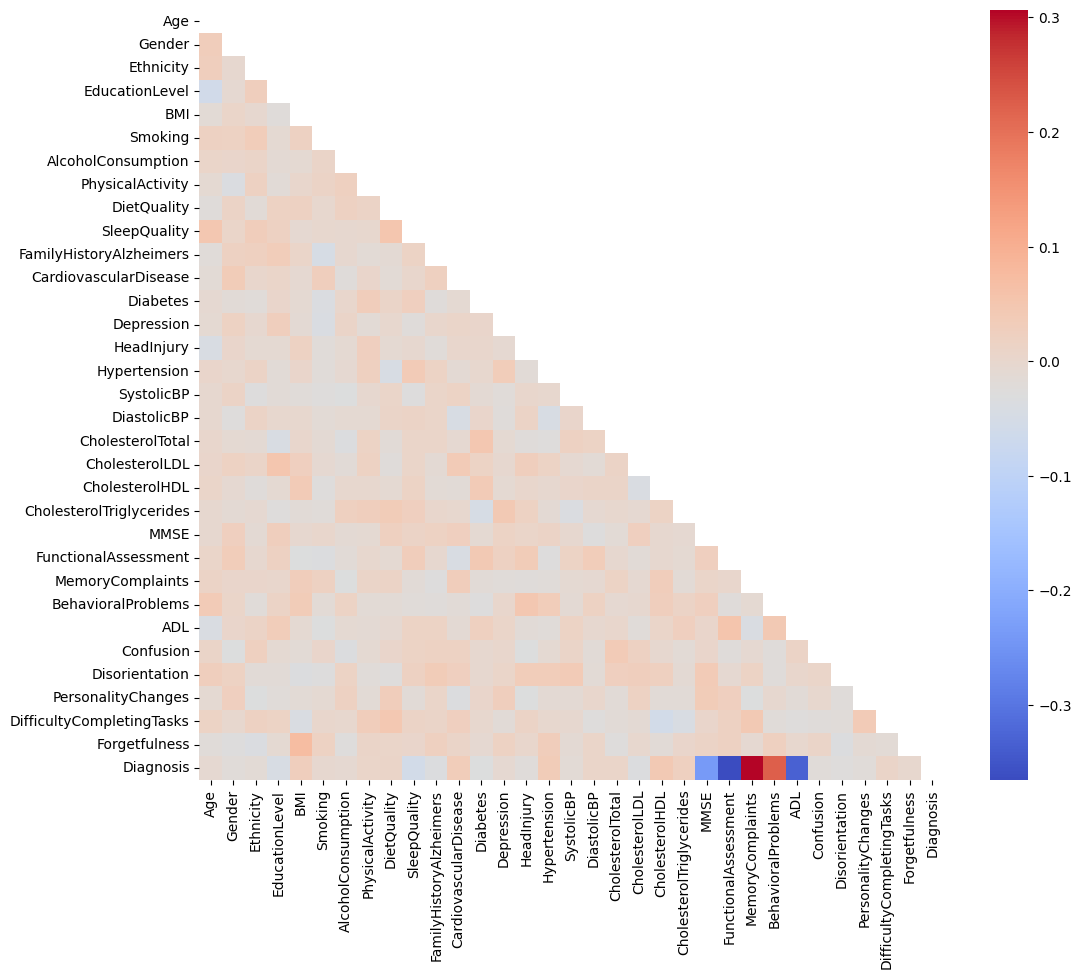

In [14]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool)) 

plt.figure(figsize=(12, 10)) 
sns.heatmap(df.corr(), mask=mask, cmap='coolwarm')
plt.show() 

* **Calculate Pearson Correlation Coefficient**



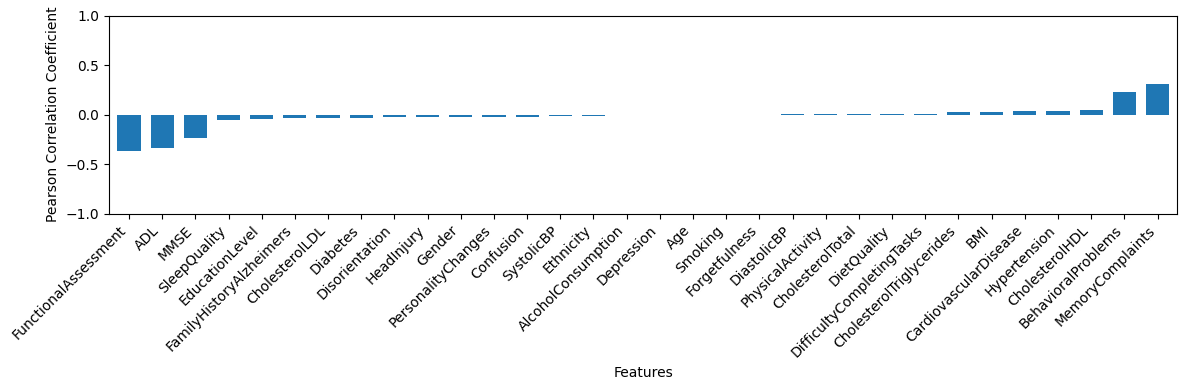

In [15]:
correlations = df.corr()['Diagnosis'][:-1].sort_values() 

plt.figure(figsize=(12, 4)) 
ax = correlations.plot(kind='bar', width=0.7) 
ax.set(ylim = [-1, 1], ylabel='Pearson Correlation Coefficient', xlabel = 'Features') 
ax.set_xticklabels(correlations.index, rotation=45, ha='right') 

plt.tight_layout() 
plt.show() 

### **3. 🔍 Chi-square test** 

### **4. 🔍 Point-Biserial Correlation Coefficient** 


=== Point-Biserial Correlation Results ===
Correlation Coefficient: -0.365
P_value:  0.0000

 Interpretation
- Direction: Negative Correlation
- Strength: abs(-0.365) (moderate effect)
- The correlation is statistically significant (p < 0.05)

 Group Statistics


Text(0.5, 1.0, 'Functional Assessment categorized by Diagnosis Status')

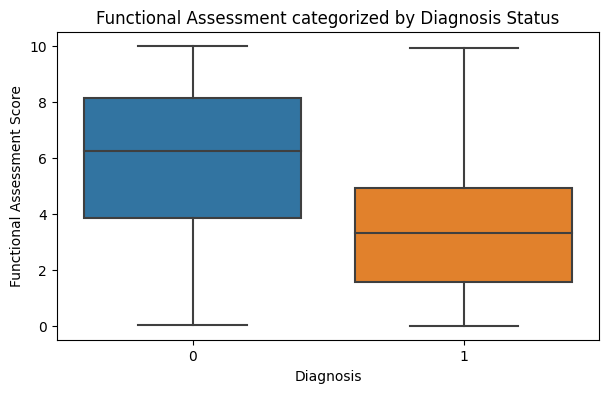

In [16]:
fa = df['FunctionalAssessment'] 
diagnosis = df['Diagnosis'] 

r_pb, P_value = stats.pointbiserialr(fa, diagnosis) 

print('\n=== Point-Biserial Correlation Results ===') 
print(f'Correlation Coefficient: {r_pb:.3f}') 
print(f'P_value: {P_value: .4f}') 

print('\n Interpretation') 
print(f"- Direction: {'Negative' if r_pb < 0 else 'Positive'} Correlation" ) 
print(f"- Strength: abs({r_pb:.3f}) ({'small' if abs(r_pb) < 0.3 else 'moderate' if abs(r_pb) < 0.5 else 'strong'} effect)")
alpha=0.05 
if P_value < alpha: 
    print(f'- The correlation is statistically significant (p < {alpha})')
else: 
    print(f'- The correlation is not statistically significant (p >= {alpha})') 

print('\n Group Statistics') 
group_stats = pd.DataFrame({
    'Healthy(0)': fa[diagnosis==0].describe(),
    'Disease(1)': fa[diagnosis==1].describe()}).round(2)
group_stats 


plt.figure(figsize=(7, 4))
sns.boxplot(x=diagnosis, y=fa)
plt.xlabel('Diagnosis')
plt.ylabel('Functional Assessment Score') 
plt.title('Functional Assessment categorized by Diagnosis Status') 